# Case Study Project : Cyclistic Bike Sharing - Google Data Analysis Profressional Certificate
Analyze with Python

Performer : Tran Toan Minh

![Imgur](https://i.imgur.com/WPKB6jE.png)

# 1. Introduction 

- This case study is the Capstone Project of Google Data Analysis Profressional Certificate course on Coursera .

- Cyclistic is a bike-share company in Chicago .

- In this case study , marketing team wants to understand how casual riders and annual members use their company service differently . Through my insights , our team will design a new marketing stategy to attract casual riders become members use our service .

- I will perform analysis this case study with Python language , follow the steps of data analysis progress : **ask , prepare, analyze , share** and **act.**


# 2. Ask

### 2.1. Question ?

* How do annual members and casual riders use Cyclistic bikes differently ?

### 2.2. Key Shakeholders

* The key stakeholders are :
 * Cyclistic executive team

 * Lily Moreno (fictional supervisor)

# 3. Prepare

### 3.1. Analysis Time

* The data I used is Cyclistic's History Trip Data to analyze and indentify trends .
* The analytical data set includes 12 subsets corresponding to 12 months from June 2022 to May 2023 .

### 3.2. Type of Data

* Type of files is ".csv" file after unzip all datasets.
* The datas are structered data 
* The data has been made available bt Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement) .

### 3.3. ROCCC requirements

Are there issues with bias or credibility in this data? Does your data ROCCC? Apart from the unrecorded station names and IDs, the data seem to meet the ROCCC requirements. Let’s look at them one by one :

* **Reliable** - Despite the absence of station names and IDs in about 30% of the transactions, overall, data remains reliable as coordinates are present across all transactions. If there is a need to identify the station names and IDs of the missing values, we can simply match their coordinates to the coordinates of transactions with existing stations names/IDs.
* **Original** - Data is proprietary to Cyclistic.
* **Comprehensive** - We are only looking at 2022 -2023 data but record goes back to 2013. In 2022 and 2023, there were over 5 M transactions–giving us a wealth of data to work with and possibly provide accurate results even with a sample size.
* **Current** - The data remains current and valid to come up with plausible recommendations given almost similar circumstances between 2022 and 2023 .
* **Cited** - As mentioned, we are working with first-party data generated from Cyclistic’s bike-sharing technology.

# 4. Process

### 4.1. Data Colection

In [1]:
# Import nessesary modules to support process , perform exploration , visualize datas
import pandas as pd , numpy as np , matplotlib.pyplot as plt , plotly.express as px , seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import ipywidgets
from ipywidgets import interact
from pandas.api.types import CategoricalDtype
import math
import os
# Some below modules to support to get directly datas from a website 
import zipfile
import requests
from io import BytesIO
# To ignore some future warnings , should use filterwarnings
import warnings 
warnings.filterwarnings(action = "ignore" , category = FutureWarning)


In [2]:
# If you want to import directly datas from website :
# path = "https:/.../file.zip"
# r = requests.get(path)
# buf = BytesIO(r.content)
# with zipfile.ZipFile(buf ,"r") as f :
#     for name in f.namelist():
#        if name.endswith(".csv"):
#            with f.open(name) as zd :
#                df = pd.read_csv(zd , encoding = 'utf-8')
#        break 
# repeat for remaining 11 files , after that use pd.concat to merge datas
# should use this import way in cases that your disk out of memory , secure problems.

In [3]:
# This below code lines use module os to print dataframe to load 
path = "/kaggle/input"
count = 1
for root, directories ,filenames in os.walk(path):
    for filename in filenames:
        full_path_names = os.path.join(root,filename)
        variables = "df{}".format(count)
        #print(full_file_names) to review full path address of files 
        print("{} =pd.read_csv('{}')".format(variables,full_path_names))
        count += 1        

df1 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202302-divvy-tripdata/202302-divvy-tripdata.csv')
df2 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202303-divvy-tripdata/202303-divvy-tripdata.csv')
df3 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202301-divvy-tripdata/202301-divvy-tripdata.csv')
df4 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202208-divvy-tripdata/202208-divvy-tripdata.csv')
df5 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202206-divvy-tripdata/202206-divvy-tripdata.csv')
df6 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202209-divvy-tripdata/202209-divvy-publictripdata.csv')
df7 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202211-divvy-tripdata/202211-divvy-tripdata.csv')
df8 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202212-divvy-tripdata/202212-divvy-tripdata.csv')
df9 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202305-divvy-tripdata/202305-divvy-tripdata.csv')
df10 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202304-divvy-

In [4]:
# paste above output to load and concatenate datas to a final dataset
df1 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202302-divvy-tripdata/202302-divvy-tripdata.csv')
df2 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202303-divvy-tripdata/202303-divvy-tripdata.csv')
df3 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202301-divvy-tripdata/202301-divvy-tripdata.csv')
df4 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202208-divvy-tripdata/202208-divvy-tripdata.csv')
df5 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202206-divvy-tripdata/202206-divvy-tripdata.csv')
df6 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202209-divvy-tripdata/202209-divvy-publictripdata.csv')
df7 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202211-divvy-tripdata/202211-divvy-tripdata.csv')
df8 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202212-divvy-tripdata/202212-divvy-tripdata.csv')
df9 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202305-divvy-tripdata/202305-divvy-tripdata.csv')
df10 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202304-divvy-tripdata/202304-divvy-tripdata.csv')
df11 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202210-divvy-tripdata/202210-divvy-tripdata.csv')
df12 =pd.read_csv('/kaggle/input/cyclisticbikesharing/202207-divvy-tripdata/202207-divvy-tripdata.csv')
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

In [5]:
# backup file : df.to("path/file.csv" , index = False)

In [6]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CBCD0D7777F0E45F,classic_bike,2023-02-14 11:59:42,2023-02-14 12:13:38,Southport Ave & Clybourn Ave,TA1309000030,Clark St & Schiller St,TA1309000024,41.920771,-87.663712,41.907993,-87.631501,casual
1,F3EC5FCE5FF39DE9,electric_bike,2023-02-15 13:53:48,2023-02-15 13:59:08,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Lawrence Ave,TA1309000041,41.957879,-87.649584,41.969517,-87.654691,casual
2,E54C1F27FA9354FF,classic_bike,2023-02-19 11:10:57,2023-02-19 11:35:01,Southport Ave & Clybourn Ave,TA1309000030,Aberdeen St & Monroe St,13156,41.920771,-87.663712,41.880419,-87.655519,member
3,3D561E04F739CC45,electric_bike,2023-02-26 16:12:05,2023-02-26 16:39:55,Southport Ave & Clybourn Ave,TA1309000030,Franklin St & Adams St (Temp),TA1309000008,41.920873,-87.663733,41.879434,-87.635504,member
4,0CB4B4D53B2DBE05,electric_bike,2023-02-20 11:55:23,2023-02-20 12:05:48,Prairie Ave & Garfield Blvd,TA1307000160,Cottage Grove Ave & 63rd St,KA1503000054,41.794827,-87.618795,41.780531,-87.605970,member


In [7]:
df.tail(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
823483,605787F70B3B9FD3,electric_bike,2022-07-09 08:32:15,2022-07-09 08:56:10,NaN,NaN,NaN,NaN,41.74,-87.68,41.75,-87.68,member
823484,F0EECBEE637DF028,electric_bike,2022-07-17 13:27:57,2022-07-17 13:33:09,NaN,NaN,NaN,NaN,41.87,-87.66,41.87,-87.68,member
823485,B8B091DC72DDAB9D,electric_bike,2022-07-17 14:51:37,2022-07-17 14:57:01,NaN,NaN,NaN,NaN,41.95,-87.64,41.95,-87.65,member
823486,B4D3FFCC1F3AF5EC,electric_bike,2022-07-28 13:41:50,2022-07-28 13:47:17,NaN,NaN,NaN,NaN,41.88,-87.63,41.87,-87.63,member
823487,AA9217C8DA3BAC0B,electric_bike,2022-07-29 13:05:20,2022-07-29 13:10:40,NaN,NaN,NaN,NaN,41.90,-87.66,41.90,-87.67,member


### 4.2. Data Cleaning 

In [8]:
# review type of each fields
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829030 entries, 0 to 823487
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 622.6+ MB


In [9]:
#sort datasets by a subset "started_at"
df.sort_values( by = "started_at" , ascending = True,inplace=True)

In [10]:
#finding missing values
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    834545
start_station_id      834677
end_station_name      891757
end_station_id        891898
start_lat                  0
start_lng                  0
end_lat                 5961
end_lng                 5961
member_casual              0
dtype: int64

In [11]:
cell_is_null = df.isnull().sum().sum()
total_cells_in_df = np.product(df.shape)
percentage_of_null_values = round(cell_is_null/total_cells_in_df,2)
print("There are {} null value cells".format(cell_is_null))
print("Null values account for {} % in a dataframe".format(percentage_of_null_values))

There are 3464799 null value cells
Null values account for 0.05 % in a dataframe


In [12]:
# drop columns which are not relevant and especially to minimize the ram flow
cols_to_del = ["start_station_name","start_station_id",
               "end_station_name","end_station_id","start_lat",
               "start_lng","end_lat","end_lng"]
df.drop(columns = cols_to_del , inplace=True)

In [13]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,member_casual
36909,C10099D850C7FC17,classic_bike,2022-06-01 00:00:04,2022-06-01 00:02:38,member
575584,09D24A3C16552534,electric_bike,2022-06-01 00:00:12,2022-06-01 00:13:00,casual
219244,75FA47BE49CA9CE1,electric_bike,2022-06-01 00:00:43,2022-06-01 00:19:15,member
401151,D6750D9CD9900AF6,electric_bike,2022-06-01 00:00:56,2022-06-01 00:10:45,casual
413755,1317CEA2652B7043,docked_bike,2022-06-01 00:01:12,2022-06-01 00:20:00,casual


In [14]:
df.info()
# we see that started_at , ended_at are not being date time type
# ride_id is likely to have spaces in each ID
# rideable_type and member_casual must be converted to category type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829030 entries, 36909 to 90732
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   ended_at       object
 4   member_casual  object
dtypes: object(5)
memory usage: 266.8+ MB


In [15]:
# convert to datetime type
convert_type_datetime = ["started_at","ended_at"]
for col in convert_type_datetime :
    df[col] = pd.to_datetime(df[col])
# convert to category type
convert_type_category = {"ride_id": "string" ,"rideable_type" : "category" , "member_casual" : "category"}
df = df.astype(convert_type_category)

In [16]:
#create year; month; day; hour columns to analyze
df["year"] = df["started_at"].dt.year
df["month"] = df["started_at"].dt.month_name()
df["day"] = df["started_at"].dt.day_name()
df["hour"] = df["started_at"].dt.hour

#convert month; day to category type
#Converting columns as much as possible the possible convert columns to category...
# ..data type to memory optimization in analyze large data set case.
months_in_year = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
category_month = CategoricalDtype(categories = months_in_year, ordered =False)
df["month"] =df["month"].astype(category_month)
days_in_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                'Thursday', 'Friday', 'Saturday']
category_day = CategoricalDtype(categories = days_in_week,ordered = False)
df["day"] = df["day"].astype(category_day)

# year ; hour columns should be became int32;int8 type
df["year"] = df["year"].astype("int32")
df["hour"] = df["hour"].astype("int8")

# finally delete spaces between ride_id 
df["ride_id"] = df["ride_id"].str.strip()

In [17]:
df.info()
# check again infomations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829030 entries, 36909 to 90732
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   rideable_type  category      
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  category      
 5   year           int32         
 6   month          category      
 7   day            category      
 8   hour           int8          
dtypes: category(4), datetime64[ns](2), int32(1), int8(1), string(1)
memory usage: 227.9 MB


In [18]:
# create ride_length columns and convert delta time type to minutes
df["ride_duration"] = df["ended_at"] - df["started_at"]
df["ride_length"] = df["ride_duration"]// pd.Timedelta(minutes=1)
df.drop(columns = "ride_duration" , inplace=True)
print(df.info())
print("\n")
print("-"*20)

# check unique values of each columns
print(df.apply(lambda x : x.unique()))
print("\n")
print("-"*20)

# show unique values of some columns to check
show_unique = ["rideable_type","month","day","month","day","hour"]
for col in show_unique:
    print("Unique values of {} are {}".format(col, df[col].unique()))
    print("-"*20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829030 entries, 36909 to 90732
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   rideable_type  category      
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  category      
 5   year           int32         
 6   month          category      
 7   day            category      
 8   hour           int8          
 9   ride_length    int64         
dtypes: category(4), datetime64[ns](2), int32(1), int64(1), int8(1), string(1)
memory usage: 272.4 MB
None


--------------------
ride_id          [C10099D850C7FC17, 09D24A3C16552534, 75FA47BE4...
rideable_type    ['classic_bike', 'electric_bike', 'docked_bike...
started_at       [2022-06-01T00:00:04.000000000, 2022-06-01T00:...
ended_at         [2022-06-01T00:02:38.000000000, 2022-06-01T00:...
member_casual    ['member', 'casual']
Categories (2, object): [...


In [19]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,year,month,day,hour,ride_length
36909,C10099D850C7FC17,classic_bike,2022-06-01 00:00:04,2022-06-01 00:02:38,member,2022,June,Wednesday,0,2
575584,09D24A3C16552534,electric_bike,2022-06-01 00:00:12,2022-06-01 00:13:00,casual,2022,June,Wednesday,0,12
219244,75FA47BE49CA9CE1,electric_bike,2022-06-01 00:00:43,2022-06-01 00:19:15,member,2022,June,Wednesday,0,18
401151,D6750D9CD9900AF6,electric_bike,2022-06-01 00:00:56,2022-06-01 00:10:45,casual,2022,June,Wednesday,0,9
413755,1317CEA2652B7043,docked_bike,2022-06-01 00:01:12,2022-06-01 00:20:00,casual,2022,June,Wednesday,0,18


In [20]:
# drop records have ride_length have value less than 1 munute
df[df["ride_length"] <1].count()

ride_id          145973
rideable_type    145973
started_at       145973
ended_at         145973
member_casual    145973
year             145973
month            145973
day              145973
hour             145973
ride_length      145973
dtype: int64

In [21]:
#take df which have ride_length has ride_length larger than or equal 1 minute
df = df[df["ride_length"] >= 1]

In [22]:
# take df have records that the time not over the 2023/06/01
now = pd.Timestamp("2023-06-01")
df = df[df["ended_at"] < now]

In [23]:
df.isnull().sum()
# check null

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
year             0
month            0
day              0
hour             0
ride_length      0
dtype: int64

In [24]:
df["ride_id"].duplicated().sum()
# check duplicate ride_id

0

### 4.3. Let Analyze and Visualize 

#### **4.3.1. BOX PLOT TO DETERMINE THE DISTRIBUTION OF MEMBER AND CASUAL IN TERM OF RIDE LENGTH**

In [25]:
print("Mode of member riders length : ")
print(df[df["member_casual"] == "member"]["ride_length"].mode())
print("-"*50)
print("Mode of casual riders length : ")
print(df[df["member_casual"] == "casual"]["ride_length"].mode())
print("-"*50)
print("Summary of statistical results of ride length of casual riders :")
print(df[df["member_casual"] == "member"]["ride_length"].describe())
print("-"*50)
print("Summary of statistical results of ride length of member riders :")
print(df[df["member_casual"] == "casual"]["ride_length"].describe())


Mode of member riders length : 
0    4
Name: ride_length, dtype: int64
--------------------------------------------------
Mode of casual riders length : 
0    6
Name: ride_length, dtype: int64
--------------------------------------------------
Summary of statistical results of ride length of casual riders :
count    3.424733e+06
mean     1.230084e+01
std      2.945996e+01
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.500000e+01
max      1.559000e+03
Name: ride_length, dtype: float64
--------------------------------------------------
Summary of statistical results of ride length of member riders :
count    2.258200e+06
mean     2.823601e+01
std      2.762797e+02
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      2.300000e+01
max      4.138700e+04
Name: ride_length, dtype: float64


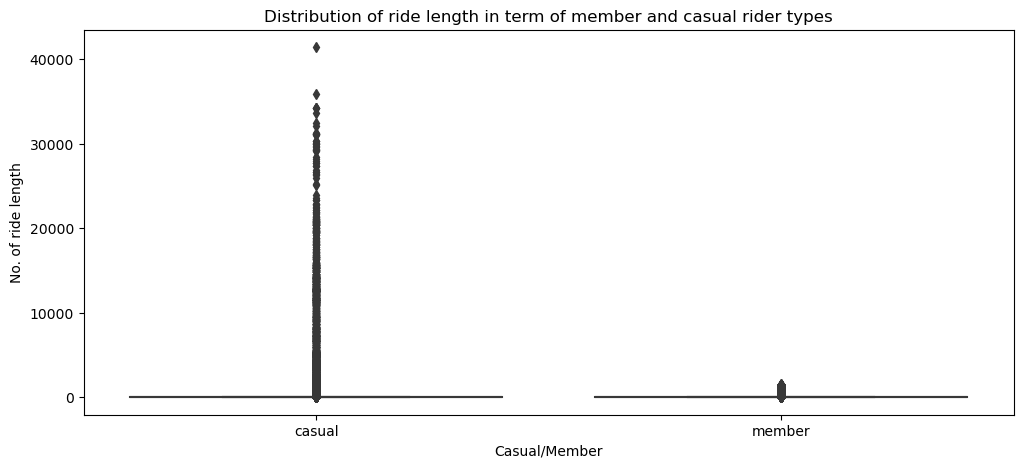

In [26]:
plt.figure(figsize = (12,5))
plt.title("Distribution of ride length in term of member and casual rider types")
sns.boxplot(df, x="member_casual", y= "ride_length" , palette=["#F8766D", "#00BA38"])
plt.xlabel("Casual/Member")
plt.ylabel("No. of ride length")
plt.show()

*=> Its can be seen that the most casual riders use this services in the the long time , more ride duration larger than 2 hours compared to the most member riders , some casuals use serives in almostly (10000 -39000) minutes ~ (10-27) days*

#### **4.3.2. FIND DIFFERENCES BETWEEN NUMBER OF MEMBERS AND CASUALS OVER THE PERIOD / THE MONTHS / MONTHS AND YEARS**

a. Over the period

In [27]:
pivot1 = df.pivot_table(
                        index = "member_casual",
                        values = "ride_id",
                        aggfunc = ["count"],
                        margins = True,
                        margins_name = "Total Count"
        )
print(pivot1)
print("-"*40)
group1 = df.groupby("member_casual", as_index = False).count()
group1 = group1.query("ride_id !=0")
fig = px.pie(group1,
            values = "ride_id",
            names = "member_casual",
            
            title = "Riders Counted From 6/2022 - 5/2023",
            labels = {"member_casual" : "Member/Casual", "ride_id":"No. of Riders"}
            )
fig.show()

                 count
               ride_id
member_casual         
casual         2258200
member         3424733
Total Count    5682933
----------------------------------------


*=> In the period June 2022 to May 2023 , it can be seen that casuals account for 39,77% (2.26 M riders) , meanwhile , member account for 60,23% (3.42 M riders).*

b. Over the month 

In [28]:
pivot2 = df.pivot_table(
                        index = ["month","member_casual"],
                        values ="ride_id",
                        aggfunc = ["count"],
                        margins =True,
                        margins_name = "Total Count"
                        )
print(pivot2)
print("-"*40)
group2 = df.groupby(["month","member_casual"], as_index = False).count()
group2 = group2.query("ride_id !=0")
fig = px.line(group2 ,
              x="month" , 
              y= "ride_id", 
              color = "member_casual",
              markers = True,
              title = "Member/Casual in term of Months ")
fig.show()

                             count
                           ride_id
month       member_casual         
January     casual           38837
            member          145276
February    casual           41818
            member          142626
March       casual           60279
            member          189322
April       casual          142521
            member          269086
May         casual          227286
            member          359545
June        casual          361929
            member          391891
July        casual          397648
            member          408026
August      casual          351164
            member          417206
September   casual          290384
            member          395425
October     casual          204205
            member          341370
November    casual           98383
            member          231675
December    casual           43746
            member          133285
Total Count                5682933
--------------------

* Over the months from 6/2022 to 5/2023 , total number of riders tend to fall dramatically in the winter season and rise during summer season (between May and Agust) .
* The behaviour of both member and casual tend to be the same as the season changes .
* Maxium riders are likely using bikes in summer season . With casual riders , it peaks at July with (397,6 K riders) , meanwhile , member riders peak at August with 417,2 K riders .
* Member riders always overtake the casual members.

c. Over the years/months

In [29]:
pivot3 = df.pivot_table(
                        index = ["year","month","member_casual"],
                        values ="ride_id",
                        aggfunc = ["count"],
                        margins =True,
                        margins_name = "Total Count"
                        )
pivot3 = pivot3.loc[(pivot3 !=0).any(axis =1)]
print(pivot3)
print("-"*40)

#Visualyze by Plotly by first way 
group3 = df.groupby(["year","month","member_casual"], as_index =False).count()
group3 = group3.query("ride_id != 0")
group3_2022 = group3[group3["year"] == 2022]
group3_2023 = group3[group3["year"] == 2023]

fig = make_subplots(rows =1 , cols =2 , shared_xaxes =True)

trace1 = go.Scatter(
        x= group3_2022["month"],
        y= group3_2022["ride_id"],
        mode = "lines+markers",
        name = "2022",
        marker = dict(color ="blue")
)
fig.add_trace(trace1,row =1, col=1)

trace2 = go.Scatter(
        x = group3_2023["month"],
        y = group3_2023["ride_id"],
        mode = "lines+markers",
        name = "2023",
        marker = dict(color ="green")
)
fig.add_trace(trace2,row =1, col=2)

fig.update_layout(title = "Riders Counts by Year/Month",
                 xaxis_title = "Month",
                 yaxis_title = "Ride Counts")
fig.show()

                                       count
                                     ride_id
year        month     member_casual         
2022        June      casual          361929
                      member          391891
            July      casual          397648
                      member          408026
            August    casual          351164
                      member          417206
            September casual          290384
                      member          395425
            October   casual          204205
                      member          341370
            November  casual           98383
                      member          231675
            December  casual           43746
                      member          133285
2023        January   casual           38837
                      member          145276
            February  casual           41818
                      member          142626
            March     casual           60279
          

In [30]:
# Visualze with Plotly by second way
month_order = ['January', 'February', 'March', 'April', 
               'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']
fig = px.line(group3 , x = "month", 
              y="ride_id" , 
              color="member_casual",
              facet_col = "year" ,
              facet_col_spacing = 0.005,
              line_group = "year",
              markers =True,
              category_orders = {"month" : month_order},
              labels = {"month": "Month" , "ride_id" : "No. of Riders"})
fig.update_layout(title='Member Casual Counts by Years/Months')
fig.show()

*=> In 2022 , member riders use service get highest at August with 417.2 K riders , casual riders get highest at July with 397.6 K riders .*

*=> Until May 2023 , member riders tend to increase and peak at May 2023 with 359.54 K riders , casual has 227.28 K riders .*



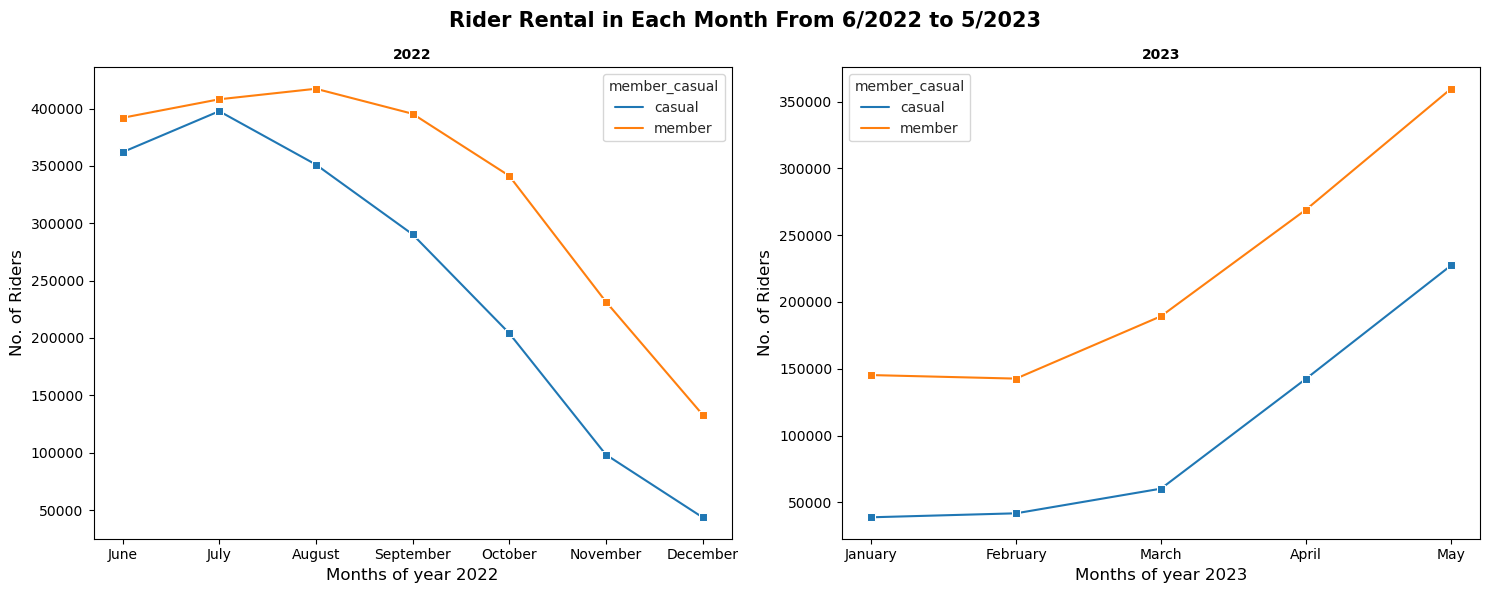

In [31]:
# Visualyze by Matplotlib and Seaborn
xlabel = list(group3["year"].unique())
n_cols = 2
n_rows = math.ceil(len(xlabel)/n_cols)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 6))

fig.subplots_adjust(top=0.8)
fig.suptitle('Rider Rental in Each Month From 6/2022 to 5/2023', fontsize=15, fontweight='bold')

for i, year in enumerate(xlabel):
    sns.set_style("whitegrid")
    ax = axs.flat[i]
    sns.lineplot(group3,x= group3[group3["year"] == year]["month"],
                 y= group3[group3["year"] == year]["ride_id"] ,
                 hue = "member_casual",
                 marker = "s", ax=ax)
    ax.set_title(str(year), fontsize=10, fontweight='bold')
    ax.set_xlabel("Months of year {}".format(year), size=12)
    ax.set_ylabel("No. of Riders", size=12)

plt.tight_layout()
plt.show()


#### **4.3.2. FIND DIFFERENCES BETWEEN THE NUMBER OF MEMBERS AND CASUALS BY DAYS WEEK**

In [32]:
pivot5 = df.pivot_table(
                        index = ["day","member_casual"],
                        values ="ride_id",
                        aggfunc = ["count"],
                        margins =True,
                        margins_name = "Total Count"
                        )
print(pivot5)
print("-"*40)
group5 = df.groupby(["day","member_casual"], as_index =False).count()
group5 = group5.query("ride_id !=0")
px.bar(group5,
      y= "day",
      x= "ride_id",
      hover_name = "member_casual",
      orientation = "h",
      color = "member_casual",
      barmode = "group",
      hover_data = ["day","ride_id"],
      labels = {"ride_id" : "Rider Counts", "day" : "Days of Week"})

                             count
                           ride_id
day         member_casual         
Sunday      casual          366791
            member          383911
Monday      casual          251879
            member          459132
Tuesday     casual          264558
            member          538268
Wednesday   casual          285075
            member          564742
Thursday    casual          306054
            member          549812
Friday      casual          338563
            member          488174
Saturday    casual          445280
            member          440694
Total Count                5682933
----------------------------------------


*=> It shows that more casual riders are using service on Weekends ( Saturdays and Sundays) .*

*=> While the number of member riders tend to use service the same almost daily.*

#### **4.3.3. FIND DIFFERNCE BETWEEN THE NUMBER OF MEMBERS AND CASUALS BY HOURS**

In [33]:
pivot6 = df.pivot_table(
                        index = ["hour","member_casual"],
                        values ="ride_id",
                        aggfunc = ["count"],
                        margins =True,
                        margins_name = "Total Count"
                        )
print(pivot6)
print("-"*40)
group6 = df.groupby(["hour","member_casual"], as_index =False).count()
group6 = group6.query("ride_id !=0")
px.bar(group6,
      y= "hour",
      x= "ride_id",
      hover_name = "member_casual",
      orientation = "h",
      barmode = "group",
      color = "member_casual",
      hover_data = ["day","ride_id"],
      labels = {"ride_id" : "Rider Counts", "hour" : "Hour"})

                             count
                           ride_id
hour        member_casual         
0           casual           43810
            member           35829
1           casual           28764
            member           21943
2           casual           17616
            member           12869
3           casual           10242
            member            7896
4           casual            7179
            member            8722
5           casual           12397
            member           31801
6           casual           30771
            member           95895
7           casual           53091
            member          178074
8           casual           71249
            member          216428
9           casual           72226
            member          149606
10          casual           90873
            member          138260
11          casual          117234
            member          163711
12          casual          139220
            member  

*=> The tendency of use service of both type riders are likely the same , use more during afternoon , peak use during evening .*


#### **4.3.4. AVERAGE OF MEMBER/CASUAL IN TERM OF RIDE LENGTH OVER PERIODS / MONTHS / DAYS /HOURS**

a. Over the period

In [34]:
pivot7 = pd.pivot_table(df,
               index = 'member_casual',
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')
print(pivot7)
print("-"*40)
group7 = round(df.groupby("member_casual" , as_index=False).mean(),3)

px.bar(group7, y = 'ride_length', x = 'member_casual',
        color = 'member_casual', 
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual'},
      )

                          mean
                   ride_length
member_casual                 
casual               28.236015
member               12.300843
Total Ride Average   18.632927
----------------------------------------


*=> The average ride length of casual riders are more than twice of members .*

b. Over the months

In [35]:
pivot8 = pd.pivot_table(df,
               index = ['month','member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')
print(pivot8)
print("-"*40)
group8 = round(df.groupby(["month","member_casual"] , as_index=False).mean(),3)

px.bar(group8, y = 'ride_length', x = 'month',
        color = 'member_casual', 
        barmode = "group",
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'month': 'Member/Casual'},
      )

                                        mean
                                 ride_length
month              member_casual            
January            casual          23.100574
                   member          10.216719
February           casual          23.355421
                   member          10.572259
March              casual          21.592395
                   member          10.333839
April              casual          28.094961
                   member          11.632827
May                casual          27.444889
                   member          12.908957
June               casual          32.231543
                   member          13.794532
July               casual          29.397263
                   member          13.534380
August             casual          29.457111
                   member          13.198219
September          casual          28.093159
                   member          12.777824
October            casual          26.504993
          

*=> It shows that average ride length of both rider types tend to fluctuate the same , the ride length get highest in summer season.*

c. Over the Days

In [36]:
pivot9 = pd.pivot_table(df,
               index = ['day','member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')
print(pivot9)
print("-"*40)
group9 = round(df.groupby(["day","member_casual"] , as_index=False).mean(),3)

px.bar(group9, y = 'ride_length', x = 'day',
        color = 'member_casual', 
        barmode = "group",
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'day': 'Member/Casual'},
      )

                                        mean
                                 ride_length
day                member_casual            
Sunday             casual          33.444493
                   member          13.729349
Monday             casual          27.637596
                   member          11.661298
Tuesday            casual          25.161602
                   member          11.797084
Wednesday          casual          23.796057
                   member          11.700890
Thursday           casual          24.363642
                   member          11.860982
Friday             casual          27.388480
                   member          12.178373
Saturday           casual          32.259298
                   member          13.791268
Total Ride Average                 18.632927
----------------------------------------


*=> Member and casual riders tend to have ride time duration the most in Weekends .*

d. Over the Hours

In [37]:
pivot10 = pd.pivot_table(df,
               index = ['hour','member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')
print(pivot9)
print("-"*40)
group10 = round(df.groupby(["hour","member_casual"] , as_index=False).mean(),3)

fig_hour = px.bar(group10, y = 'ride_length', x = 'hour',
            color = 'member_casual', 
            barmode = "group",
            text = 'ride_length', 
            labels = {'ride_length': 'Average Ride Length (minutes)', 'hour': 'Member/Casual'},
          )
fig_hour.update_layout(
            xaxis_tickangle = 0,
            xaxis_tickfont_size = 11)
fig_hour.show()

                                        mean
                                 ride_length
day                member_casual            
Sunday             casual          33.444493
                   member          13.729349
Monday             casual          27.637596
                   member          11.661298
Tuesday            casual          25.161602
                   member          11.797084
Wednesday          casual          23.796057
                   member          11.700890
Thursday           casual          24.363642
                   member          11.860982
Friday             casual          27.388480
                   member          12.178373
Saturday           casual          32.259298
                   member          13.791268
Total Ride Average                 18.632927
----------------------------------------


*=> The casual riders have more time use service in 1:AM to 4:AM , meanwhile , their tendency of ride length are the same .*

e. Final Subplots by Plotly

In [38]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#f0ad4e', '#3a87ad']

group8_casual = group8[group8["member_casual"] == "casual"]
group8_member = group8[group8["member_casual"] == "member"]
group9_casual = group9[group9["member_casual"] == "casual"]
group9_member = group9[group9["member_casual"] == "member"]
group10_casual = group10[group10["member_casual"] == "casual"]
group10_member = group10[group10["member_casual"] == "member"]

#Make Subplots
fig_final = make_subplots(rows = 4, cols =1 ,
                          shared_yaxes = True,
                          subplot_titles = ("Over the period",
                                            "Over the months",
                                           " Over the days",
                                           "Over the hours"))
#Group7 
fig_final.add_trace(go.Bar(
                            x = group7["member_casual"],
                            y = group7["ride_length"],
                            name = "Periods",
                            text = group7["ride_length"],
                            textfont_color="white",
                            marker_color=colors*len(colors)),
                            1,1)
#Group8
fig_final.add_trace(go.Bar(
                            x = group8_casual["month"],
                            y = group8_casual["ride_length"],
                            name = "casual-months",
                            text = group8_casual["ride_length"],
                            marker_color=['#bcbd22']*12),
                            2,1)
fig_final.add_trace(go.Bar(
                            x = group8_member["month"],
                            y = group8_member["ride_length"],
                            name = "member-months",
                            text = group8_member["ride_length"],
                            marker_color=['#9467bd']*12),
                            2,1)
#Group9

fig_final.add_trace(go.Bar(
                            x = group9_casual["day"],
                            y = group9_casual["ride_length"],
                            name = "casual-days",
                            text = group9_casual["ride_length"],
                            marker_color=['#8c564b']*12),
                            3,1)
fig_final.add_trace(go.Bar(
                            x = group9_member["day"],
                            y = group9_member["ride_length"],
                            name = "member-days",
                            text = group9_member["ride_length"],
                            marker_color=['#e377c2']*12),
                            3,1)

#Group10
fig_final.add_trace(go.Bar(
                            x = group10_member["hour"],
                            y = group10_member["ride_length"],
                            name = "member-hours",
                            text = group10_member["ride_length"],
                            marker_color=['#2ca02c','#d62728']*12),
                            4,1)
fig_final.add_trace(go.Bar(
                            x = group10_casual["hour"],
                            y = group10_casual["ride_length"],
                            name = "casual-hours",
                            text = group10_casual["ride_length"],
                            marker_color=['#d62728','#2ca02c']*12),
                            4,1)

fig_final.update_yaxes(title_text="Average Ride Length (minutes)", row=1, col=1)
fig_final.update_yaxes(title_text="Average Ride Length (minutes)", row=2, col=1)
fig_final.update_yaxes(title_text="Average Ride Length (minutes)", row=3, col=1)
fig_final.update_yaxes(title_text="Average Ride Length (minutes)", row=4, col=1)

#fig_final.update_traces(showlegend=True, selector=dict(name='Periods'), row=1, col=1)
#fig_final.update_traces(showlegend=True, selector=dict(name='By Months'), row=2, col=1)
#fig_final.update_traces(showlegend=True, selector=dict(name='Days'), row=3, col=1)
#fig_final.update_traces(showlegend=True, selector=dict(name='Hours'), row=4, col=1)

fig_final.update_layout(title_text="Average Ride Length Between Member and Casual",
                        height=2000,width = 1200,
                        barmode = "group",
                        
                        )
fig_final.show()

#### **4.3.5. FIND THE DIFFERNCE BETWEEN RIDEABLE TYPE OF MEMBERS AND CASUALS**

In [39]:
pivot11 = pd.pivot_table(df,
               index = ['rideable_type','member_casual'],
               values = ['ride_id'],
               aggfunc = ['count'],
               margins = True,
               margins_name = 'Total Count')
print(pivot11)
print("-"*40)

# Plot with Matplotlib and Ipywidgets 
# But it can be not displayed in HTML
group11 = df.groupby(["rideable_type","member_casual"] , as_index=False).count()
def plot_rideable_type(rideable_type):
    plt.figure(figsize = (6,8))
    ax = sns.barplot(x = "member_casual" , y="ride_id", data = group11[group11["rideable_type"] == rideable_type])
    plt.title("Rideable Type: {}".format(rideable_type)),
    plt.xlabel("Casual/Member"),
    plt.ylabel("Numbers of Riders")
    for p in ax.patches:
        x = p.get_x() + p.get_width() /2 
        y = p.get_height()
        ax.annotate(str(p.get_height()), (x,y), xytext = (0,5) ,textcoords='offset points', ha='center', va='bottom' )
    plt.show()
rides = list(group11["rideable_type"].unique())
interact(plot_rideable_type, rideable_type = rides)

                               count
                             ride_id
rideable_type member_casual         
classic_bike  casual          845158
              member         1704349
docked_bike   casual          155706
              member               0
electric_bike casual         1257336
              member         1720384
Total Count                  5682933
----------------------------------------


interactive(children=(Dropdown(description='rideable_type', options=('classic_bike', 'docked_bike', 'electric_…

<function __main__.plot_rideable_type(rideable_type)>

*=> Both rider types tend to be use more electric bike.*

*=> Classic bike is tend to be used by member riders .*

*=> In period , none of the cycling members used the docked bike .*

In [40]:
#Plot with Plotly 
fig = px.bar( group11,x="member_casual" , y="ride_id",
             color = "rideable_type" ,barmode = "group" ,
             text = "ride_id" )
fig.update_layout(
    updatemenus = [
        dict(
            active = 0,
            buttons = list([
                dict(label = 'All',
                     method = 'update',
                     args = [{'visible': [True, True,True]},
                             {'title': 'All',
                              'showlegend':True}],
                  ),
                dict(label = 'Docked Bike',
                     method = 'update',
                     args = [{'visible': [True,False,False]},
                             {'title': 'Docked Bike',
                              'showlegend':True}],
                  ),
                dict(label = 'Classic Bike',
                     method = 'update',
                     args = [{'visible': [False,True,False]},
                             {'title': 'Classic Bike',
                              'showlegend':True}]
                 ),
                dict(label = 'Electric Bike',
                     method = 'update',
                     args = [{'visible': [False,False,True]},
                             {'title': 'Electric Bike',
                              'showlegend':True}]
                 ),
                
            ]),
            direction="down",
            x=0.5,
            y=1.2,
            showactive=True
        ),
    ]
)


# 5. Act

### INSIGHTS

 
 - Annual members and Casual riders use Cyclistic bike share service **differently .**
 
 - The average ride length of casual riders are **more than twice** compared to members in every time form cases.
 
 - From the average **ride length differnce** and **rideable type** , we can conclude that Annual members use service for **daily communiting** , meanwhile , the most Casual riders use this service to **go to work , job purposes** . But there are a fixed number of casual riders wh use bike share **for communting .**
 
 - Members want to use docked bike due to a number of reasons such as : **long wait** to find an empty station, **broken station system** , **limited number** of bicycles, etc. 
 
 - However , docked bike is still a good option for casual members who want to **rent a bike easily** .

### RECMMENDATIONS

- A new **Annual Membership package for Weekend usage only** will attract current Weekend casual riders.

- **Promotions** aiming at current Weekday casual riders must be implemented as soon as possible. Those promtions must include the financial savings of taking membership when compared to single passes and full day passes for a year long period.

- A **Loyalty Program** for casual riders can be implemented, where occasional membership fees discounts must be given to casual riders with high loyalty points.

# An Extra Analysis

In [41]:
may_2023_member = df[(df["member_casual"] == "member") & (df["month"] == "May")]["ride_id"].count()
april_2023_member = df[(df["member_casual"] == "member") & (df["month"] == "April")]["ride_id"].count()

may_2023_casual = df[(df["member_casual"] == "casual") & (df["month"] == "May")]["ride_id"].count()
april_2023_casual = df[(df["member_casual"] == "casual") & (df["month"] == "April")]["ride_id"].count()

In [42]:
fig_change = go.Figure()
fig_change.add_trace(go.Indicator(
                    mode = "number +delta",
                    title = {"text" : "Member"},
                    value = may_2023_member,
                    delta = {"reference" : april_2023_member},
                    domain = {"row" : 0 , "column": 0})
                )
fig_change.add_trace(go.Indicator(
                    mode = "number +delta",
                    title = {"text" : "Casual"},
                    value = may_2023_casual,
                    delta = {"reference" : april_2023_casual},
                    domain = {"row" :1 , "column" : 0})
                )
fig_change.update_layout(
    grid = {'rows' : 2 , 'columns' : 1 ,'pattern' : 'independent'},
    template = {'data' : {'indicator': [{
        'title' : {'text' : 'Speed'},
        'mode' : 'number+delta+gauge',
        'delta' : {'reference' : 90}}]
                         }})
fig_change.show()